In [47]:
#PUT ALL IMPORTS UP HEREEE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [48]:
#Show dataframe attributes and clean up data that is irrelevant to our goal
df = pd.read_csv('global-data-on-sustainable-energy (1).csv') 
df = df.drop(columns = ['Latitude', 'Longitude', 'Land Area(Km2)', 'Electricity from nuclear (TWh)', 'Access to clean fuels for cooking', 'Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)'])

df.head()

#Keeping rows of only the 10 countries that will be used for our analyses 
countries = ['Bahrain', 'Libya', 'Jordan', 'Iraq', 'Lebanon', 'United Arab Emirates', 'Kuwait', 'Oman', 'Qatar']

data = df[df['Entity'].isin(countries)]

data = data.dropna()
'''
MAY OR MAY NOT NEED 
# Calculate year-over-year CO2 emissions change
data['CO2_Gain_YOY'] = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].diff()

# Display the updated DataFrame to check the results
data[['Entity', 'Year', 'Value_co2_emissions_kt_by_country', 'CO2_Gain_YOY']].head(10)
'''
print(len(data))
data.head(210)

#CONSTRUCT FEATURES THAT WILL BE USED IN ANALYSYS

179


,Entity,Year,Access to electricity (% of population),Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2)
252,Bahrain,2000,100.0,0.00,0.00,13.02,0.00,0.000000,157253.03,10.43,15880.00000,5.300070,13636.41675,"2,239"
253,Bahrain,2001,100.0,0.00,0.00,13.74,0.00,0.000000,158559.69,10.41,16390.00000,2.490948,12868.17692,"2,239"
254,Bahrain,2002,100.0,0.00,0.00,14.34,0.00,0.000000,165096.56,10.45,17219.99931,3.348551,13049.90973,"2,239"
255,Bahrain,2003,100.0,0.00,0.00,14.76,0.00,0.000000,165859.02,10.30,17940.00053,6.296442,14222.03680,"2,239"
256,Bahrain,2004,100.0,0.00,0.00,15.18,0.00,0.000000,160432.52,9.83,17930.00031,6.980961,15846.50595,"2,239"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,United Arab Emirates,2015,100.0,14.71,0.13,119.45,0.31,0.258851,137896.34,5.56,195240.00550,5.060335,38663.40050,118
3476,United Arab Emirates,2016,100.0,15.12,0.12,121.53,0.32,0.262618,142115.27,5.96,201080.00180,2.984216,38141.86713,118
3477,United Arab Emirates,2017,100.0,37.54,0.19,125.79,0.75,0.592698,135601.27,4.54,197039.99330,2.373551,40644.79119,118
3478,United Arab Emirates,2018,100.0,62.24,0.32,126.61,1.32,1.031814,132789.17,4.11,177119.99510,1.189856,43839.32449,118


## Finding features that correlate most with C02 Emmisions



Correlations with CO2 Emissions:
Electricity from fossil fuels (TWh)                                    0.934235
Renewable energy share in the total final energy consumption (%)       -0.412145
gdp_per_capita                                                         0.359253
Electricity from renewables (TWh)                                      0.317732
Primary energy consumption per capita (kWh/person)                     0.180025
Renewable-electricity-generating-capacity-per-capita                   0.170942
Energy intensity level of primary energy (MJ/$2017 PPP GDP)            -0.114676
Access to electricity (% of population)                                0.059212
Low-carbon electricity (% electricity)                                 0.004937
gdp_growth                                                             -0.004557


/var/folders/vl/rg3_kncs56q04n5819dzcmp80000gn/T/ipykernel_77278/243374257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation with CO2 Emissions', y='Feature', data=correlations_df, palette='coolwarm')


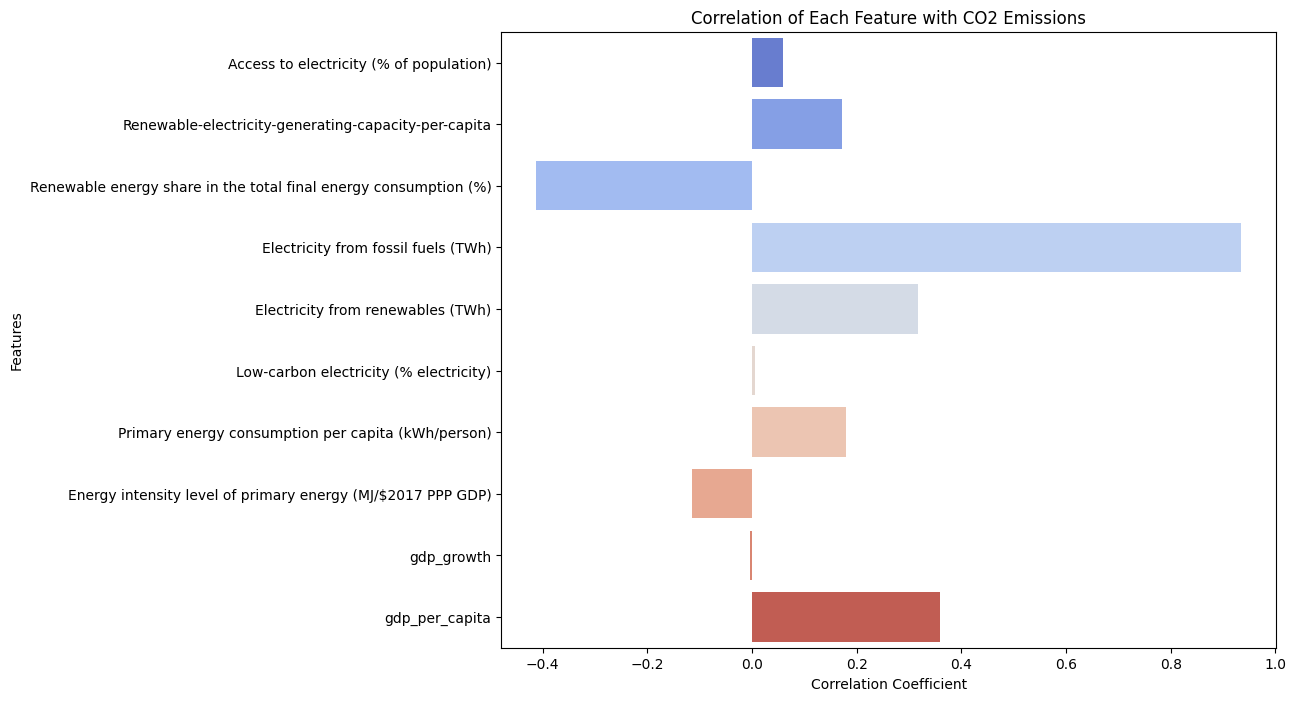

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume the CO2 emissions column is named 'Value_co2_emissions_kt_by_country'
target_variable = 'Value_co2_emissions_kt_by_country'

# Select only numerical columns, excluding the target variable
numerical_columns = data.select_dtypes(include=['float64', 'int64']).drop(columns=[target_variable, 'Year'])

# Calculate correlations of all features with the target variable (CO2 emissions)
correlations_with_co2 = numerical_columns.corrwith(data[target_variable])

# Convert to a DataFrame for easier plotting
correlations_df = correlations_with_co2.to_frame().reset_index()
correlations_df.columns = ['Feature', 'Correlation with CO2 Emissions']

# Sort the DataFrame by the absolute value of correlations
correlations_df['Absolute Correlation'] = correlations_df['Correlation with CO2 Emissions'].abs()
correlations_df_sorted = correlations_df.sort_values(by='Absolute Correlation', ascending=False).drop(columns='Absolute Correlation')

print("\nCorrelations with CO2 Emissions:")
for index, row in correlations_df_sorted.iterrows():
    print(f"{row['Feature']:<70} {row['Correlation with CO2 Emissions']:.6f}")

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x='Correlation with CO2 Emissions', y='Feature', data=correlations_df, palette='coolwarm')
plt.title('Correlation of Each Feature with CO2 Emissions')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [51]:
# Assuming 'data' is your original DataFrame with CO2 emissions as the target variable
target_variable = 'Value_co2_emissions_kt_by_country'

# Select the top 5 features based on correlation (replace with your feature names)
top_features = [
    'Electricity from fossil fuels (TWh)',
    'Renewable energy share in the total final energy consumption (%)',
    'gdp_per_capita',
    'Electricity from renewables (TWh)',
]

# Prepare the data
X = data[top_features]
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Display coefficients
coefficients = pd.DataFrame(model.coef_, index=top_features, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 192979341.95
R-squared: 0.81
                                                    Coefficient
Electricity from fossil fuels (TWh)                 1480.976055
Renewable energy share in the total final energ... -3154.922882
gdp_per_capita                                         0.042674
Electricity from renewables (TWh)                   7513.783722
